<a href="https://colab.research.google.com/github/RogerHeederer/ML_practice_MyFirstML_B/blob/master/VotingEnsenble_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn import datasets
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(5)

In [3]:
mnist = datasets.load_digits() ##MNIST에서 제공하는 원조 데이터(28 by 28)랑 다름. sklearn은 8 by 8
features, labels = mnist.data, mnist.target
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [4]:
X_train.shape, y_train.shape

((1437, 64), (1437,))

In [26]:
X_train[1400], y_train[1400]

(array([ 0.,  4., 13., 16., 16., 12.,  3.,  0.,  0.,  3.,  7.,  4., 13.,
        16.,  6.,  0.,  0.,  0.,  0.,  8., 15.,  5.,  0.,  0.,  0.,  0.,
         0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,
         0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  1.,  7., 12.,
        11.,  0.,  0.,  0.,  0.,  3., 15., 12.,  2.,  0.,  0.,  0.]), 3)

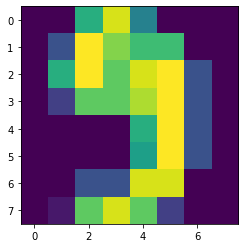

In [6]:
plt.imshow(X_train[0].reshape(8,8))

##단일 개별 모델들의 정확도 측정##

In [7]:
#의사결정나무
dtree = tree.DecisionTreeClassifier(criterion="gini", max_depth=8, max_features=32, random_state=35)
dtree = dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

#kNN
knn = KNeighborsClassifier(n_neighbors=299).fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

#SVM
svm = SVC(C=0.1, gamma=0.003, probability=True, random_state=35).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)

In [8]:
print("[accuarcy]")
print("d-tree: ",accuracy_score(y_test, dtree_predicted))
print("knn   : ",accuracy_score(y_test, knn_predicted))
print("svm   : ",accuracy_score(y_test, svm_predicted))

[accuarcy]
d-tree:  0.8277777777777777
knn   :  0.8944444444444445
svm   :  0.8916666666666667


In [10]:
#sklearn 라이브러리 통해 voting 구현가능
svm_proba = svm.predict_proba(X_test)
svm_proba.shape

(360, 10)

In [11]:
svm_proba[0] #첫번째 prediction 값의 확률(0~9 숫자 중 뭐에 가까운지)

array([0.00198803, 0.00839195, 0.00810019, 0.00463173, 0.00482916,
       0.88824992, 0.00230768, 0.00694883, 0.06909342, 0.00545907])

In [12]:
#하드 보팅은 현실 세계에서의 투표와 같다. 가장 다득표를 받은 예측값을 최종 pick!
voting_clf = VotingClassifier(estimators=[
  ('decision_tree', dtree), ('knn', knn), ('svm', svm)],
  weights=[1,1,1], voting='hard').fit(X_train, y_train)

In [13]:
hard_voting_predicted = voting_clf.predict(X_test)

In [15]:
hard_voting_predicted.shape

(360,)

In [16]:
hard_voting_predicted[0:10]

array([5, 2, 5, 5, 5, 3, 2, 2, 3, 5])

In [17]:
accuracy_score(y_test, hard_voting_predicted)

0.9222222222222223

In [23]:
#소프트 보팅은 각 분류 모델의 predict_proba를 활용하여, 모든 분류값들의 확률들을 더해서
#가장 높은 점수를 획득한 분류값을 최종 pick

voting_clf = VotingClassifier(estimators=[('decision_tree', dtree),('knn', knn),('svm', svm)],
                              weights=[1,1,1], voting='soft').fit(X_train, y_train)
soft_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.8944444444444445

##정확도 비교 시각화

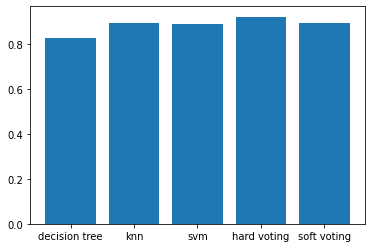

In [24]:
x = np.arange(5)
plt.bar(x, height= [accuracy_score(y_test, dtree_predicted),
                    accuracy_score(y_test, knn_predicted),
                    accuracy_score(y_test, svm_predicted),
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted)])
plt.xticks(x, ['decision tree','knn','svm','hard voting','soft voting']);

##예측값 사진으로 확인하기

In [30]:
# 랜덤하게 데이터 가져오기
random_pick = np.random.randint(low=0, high=359, size=10)
random_pick

array([266, 161, 208, 142,  60,  40,  11, 152, 102, 296])

In [31]:
y_test[random_pick] #정답

array([0, 0, 8, 9, 6, 5, 8, 1, 7, 5])

In [32]:
hard_voting_predicted[random_pick] #x_test로 테스트한 예측값

array([0, 0, 2, 9, 6, 5, 8, 1, 7, 5])

In [36]:
X_test[random_pick] # 테스트 자료 분포

array([[ 0.,  0.,  2., 14., 13.,  3.,  0.,  0.,  0.,  0., 13., 13.,  9.,
        11.,  0.,  0.,  0.,  0., 16.,  7.,  0., 12.,  0.,  0.,  0.,  3.,
        16.,  5.,  0., 10.,  5.,  0.,  0.,  5., 16.,  1.,  0.,  8.,  5.,
         0.,  0.,  3., 16.,  1.,  0., 10.,  5.,  0.,  0.,  0., 16.,  8.,
         5., 14.,  3.,  0.,  0.,  0.,  4., 16., 16.,  9.,  1.,  0.],
       [ 0.,  0.,  2., 10., 15.,  7.,  0.,  0.,  0.,  0., 14., 15.,  7.,
        15.,  2.,  0.,  0.,  4., 16.,  3.,  0., 11.,  4.,  0.,  0.,  4.,
        14.,  0.,  0.,  7.,  8.,  0.,  0.,  7., 12.,  0.,  0.,  6.,  7.,
         0.,  0.,  4., 16.,  1.,  0., 12.,  4.,  0.,  0.,  1., 14., 12.,
        10., 16.,  1.,  0.,  0.,  0.,  1., 14., 13.,  5.,  0.,  0.],
       [ 0.,  0., 15., 12.,  3.,  0.,  0.,  0.,  0.,  0., 15.,  9., 14.,
         1.,  0.,  0.,  0.,  0., 12., 10., 15.,  1.,  0.,  0.,  0.,  0.,
         5., 16.,  4., 10.,  7.,  0.,  0.,  0.,  0., 11., 14., 11.,  0.,
         0.,  0.,  0.,  1., 12., 13., 11.,  0.,  0.,  0.,  

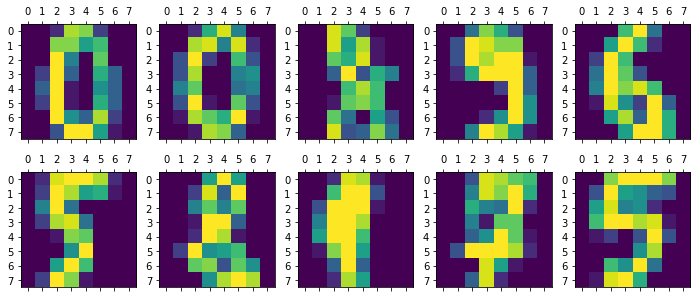

In [44]:
figure = plt.figure()
figure.set_size_inches(12,5)

axes=[]
for i in range(1, 11):
  axes.append(figure.add_subplot(2, 5, i))

tmp_list = []
for i in range(10):
  tmp = X_test[random_pick[i]]
  tmp = tmp.reshape(8,8)
  tmp_list.append(tmp)

for i in range(10):
  axes[i].matshow(tmp_list[i])

In [45]:
hard_voting_predicted[random_pick] #x_test로 테스트한 예측값

array([0, 0, 2, 9, 6, 5, 8, 1, 7, 5])

In [46]:
y_test[random_pick] #정답

array([0, 0, 8, 9, 6, 5, 8, 1, 7, 5])